# Exploration

Contents

- [Categorical vs Continuous](#Categorical-vs-Continuous)
- [Survived against Categorical Features](#Survived-against-Categorical-Features)
- [Treat our target as a number](#Treat-our-target-as-a-number)
- [Exploring our "categorical" target by 2 different categories](#Exploring-our-"categorical"-target-by-2-different-categories)
- [Proportions within a group](#Proportions-within-a-group)
- [Binning for Exploration](#Binning-for-Exploration)

- Explore the target against the independent variables.
- Data needs are slightly different than for modeling.

In [50]:
import pandas as pd
import acquire
import sklearn.model_selection
import scipy.stats as stats

df = acquire.get_titanic_data()
# use the same random seed and train size as we did earlier to get the same train split
train, test = sklearn.model_selection.train_test_split(df, random_state=123, train_size=.8)
train.head()

train = train.drop(columns=['passenger_id', 'embarked', 'class', 'deck'])

In [10]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
329,1,1,female,16.0,0,1,57.9792,Cherbourg,0
749,0,3,male,31.0,0,0,7.7500,Queenstown,1
203,0,3,male,45.5,0,0,7.2250,Cherbourg,1
421,0,3,male,21.0,0,0,7.7333,Queenstown,1
97,1,1,male,23.0,0,1,63.3583,Cherbourg,0
...,...,...,...,...,...,...,...,...,...
98,1,2,female,34.0,0,1,23.0000,Southampton,0
322,1,2,female,30.0,0,0,12.3500,Queenstown,1
382,0,3,male,32.0,0,0,7.9250,Southampton,1
365,0,3,male,30.0,0,0,7.2500,Southampton,1


## Categorical vs Continuous

- boxplot + swarmplot, violinplot -- for these functions, y should be continuous, x should be categorical
- age
- fare

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=13)

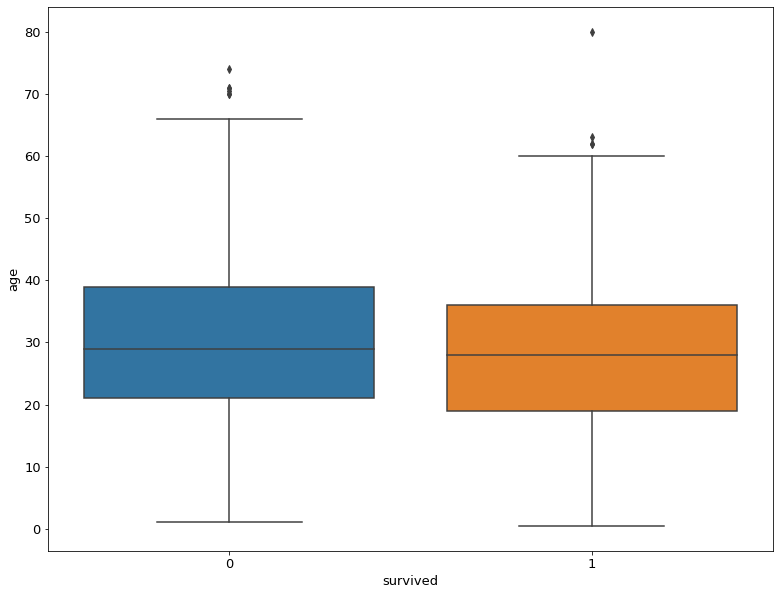

In [18]:
sns.boxplot(y='age', x='survived', data=train)

Takeaway: no big difference in age

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


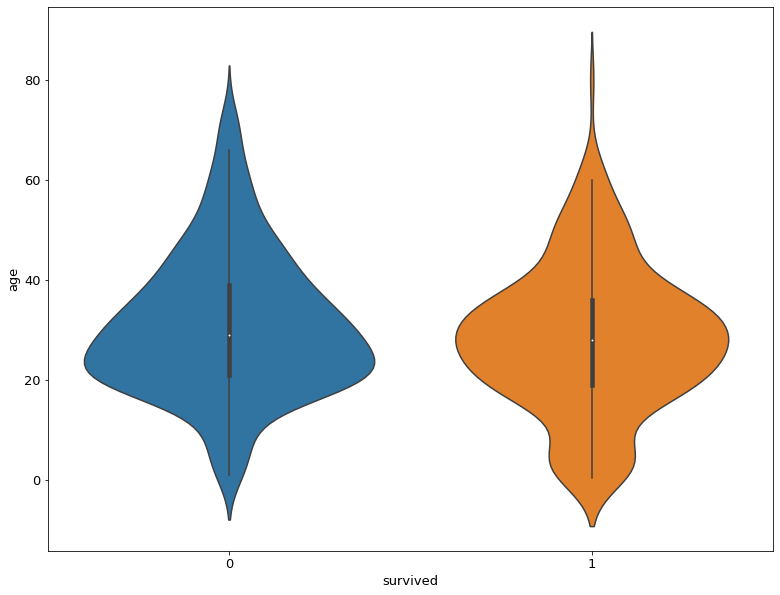

In [25]:
sns.violinplot(y='age', x='survived', data=train)

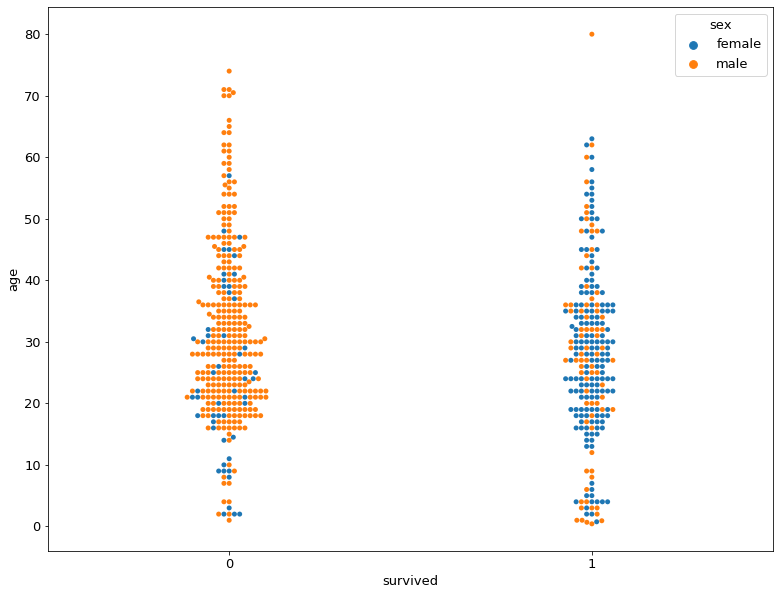

In [24]:
sns.swarmplot(y='age', x='survived', data=train, hue='sex')

Takeaways:

- it wasn't quite captured in the boxplot, but it looks like there is more clustering on the lower end of the `age` variable among those that survived
- It looks like more women survived than men

survived
0    22.501635
1    47.914547
Name: fare, dtype: float64


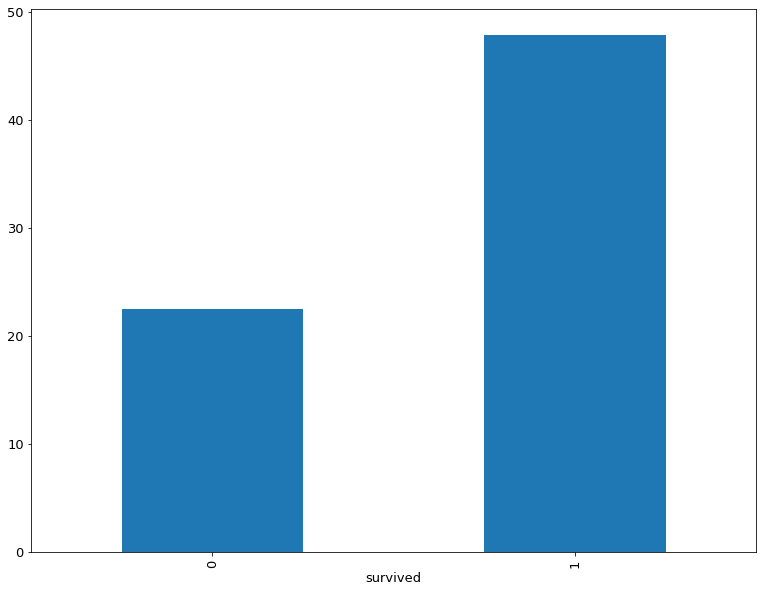

In [33]:
# with a pandas series, .plot.bar will turn the index into xlabels, and the values into bar heights
s = train.groupby('survived').fare.mean()
print(s)
s.plot.bar()

In [38]:
stats.ttest_ind(
    train[train.survived == 1].fare,
    train[train.survived == 0].fare,
)

Ttest_indResult(statistic=6.512874301818937, pvalue=1.3955507135677185e-10)

Takeaway: people that survived paid much more for their tickets.

Question: how does class play into survival rate?

Question: how does sex interact with fare?

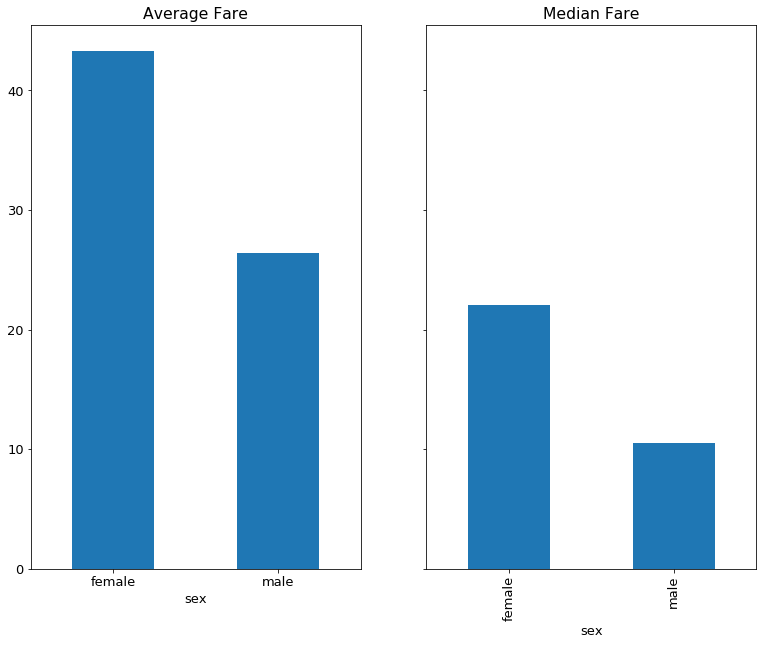

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

train.groupby('sex').fare.mean().plot.bar(ax=ax1, title='Average Fare')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
train.groupby('sex').fare.median().plot.bar(ax=ax2, title='Median Fare')

Question: what is the distribution of sex and class?

One more viz for categorical vs continuous: distribution of fare vs survived

[Text(0.5, 0, 'Fare'), Text(0.5, 1.0, 'Died')]

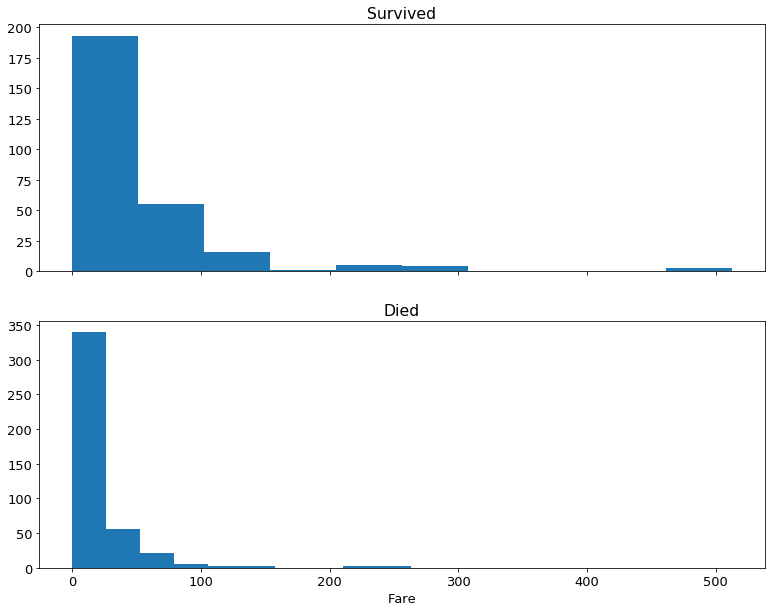

In [41]:
# .subplots(nrows, ncols)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.hist(train[train.survived == 1].fare)
ax1.set(title='Survived')
ax2.hist(train[train.survived == 0].fare)
ax2.set(title='Died', xlabel='Fare')

(<Figure size 936x720 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1343efc88>,
       dtype=object))

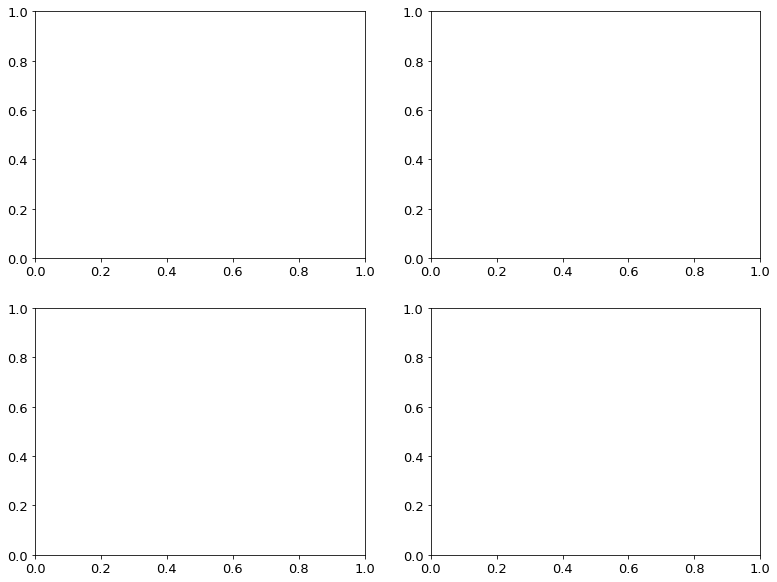

In [84]:
plt.subplots(2, 2)

[Text(0.5, 0, 'Age'), Text(0.5, 1.0, '!Survived')]

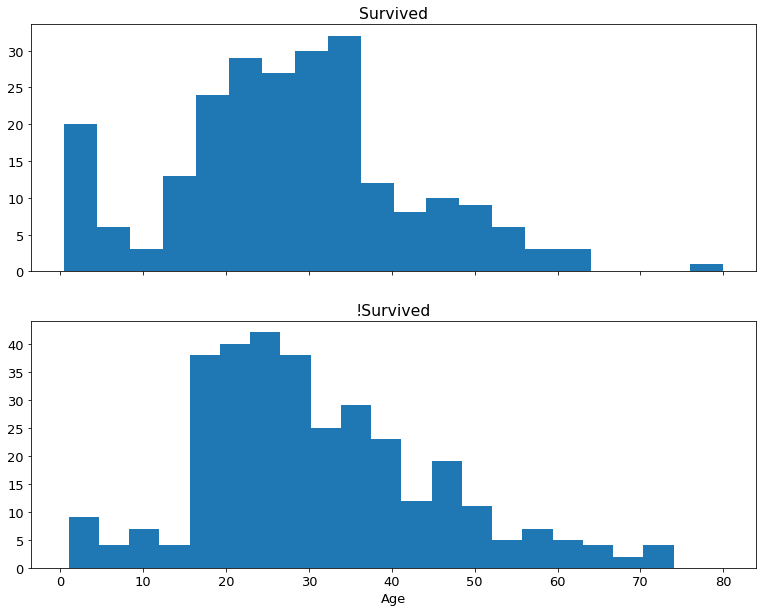

In [47]:
# .subplots returns the figure and each individual axis
# .subplots(nrows, ncols)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.hist(train[train.survived == 1].age, bins=20)
ax1.set(title='Survived')
ax2.hist(train[train.survived == 0].age, bins=20)
ax2.set(title='!Survived', xlabel='Age')

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


[Text(0.5, 0, 'Age'), Text(0.5, 1.0, '!Survived')]

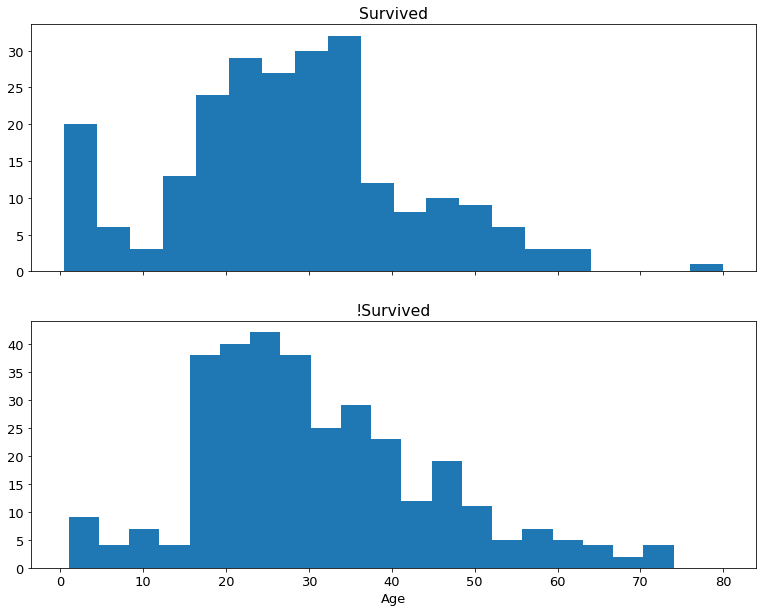

In [85]:
# .subplots returns the figure and each individual axis
# .subplots(nrows, ncols)
fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].hist(train[train.survived == 1].age, bins=20)
axs[0].set(title='Survived')
axs[1].hist(train[train.survived == 0].age, bins=20)
axs[1].set(title='!Survived', xlabel='Age')

## Survived against Categorical Features

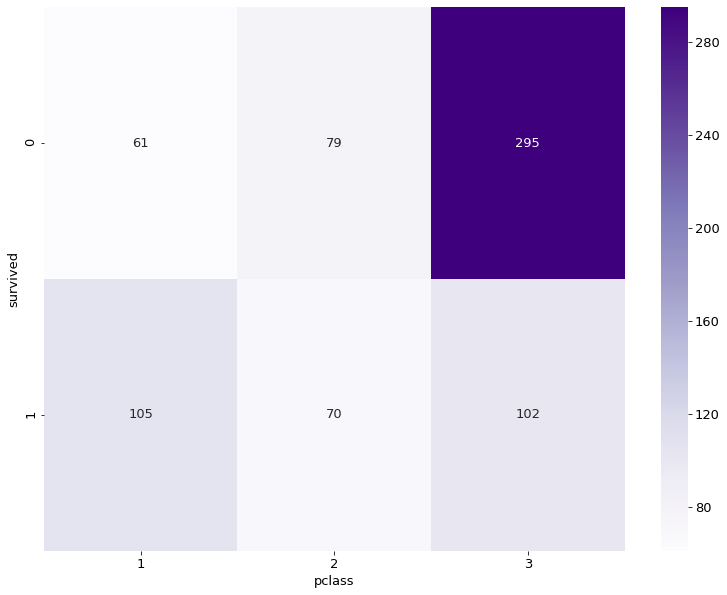

In [54]:
ctab = pd.crosstab(train.survived, train.pclass)
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='d')

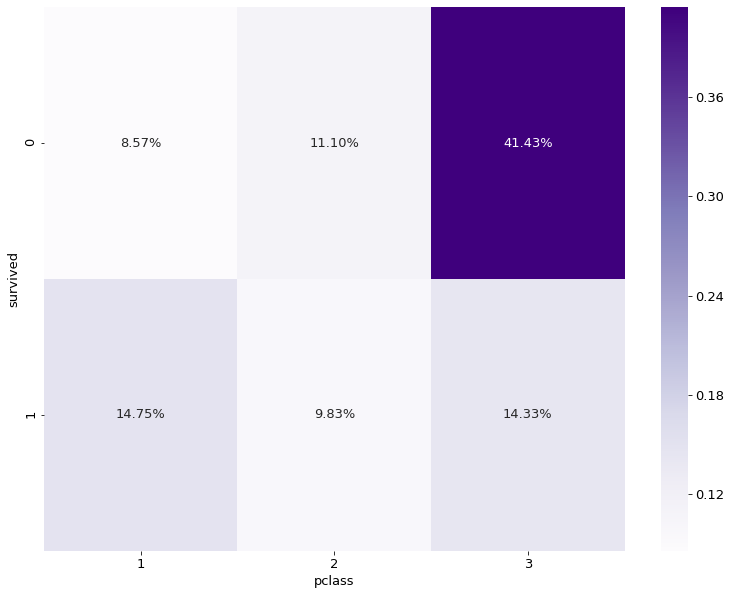

In [59]:
# normalize=True changes from raw counts to proportions
# the sum of all the numbers is 1
ctab = pd.crosstab(train.survived, train.pclass, normalize=True)
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.2%')

Takeaways:

- There are many more folks in 3rd class than any other
- The survival rate is higher for first class, lower for 3rd class

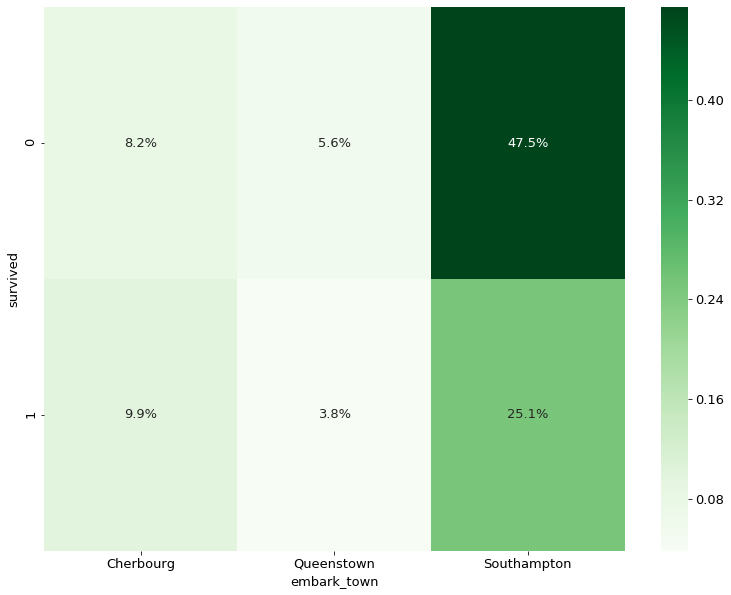

In [63]:
ctab = pd.crosstab(train.survived, train.embark_town, normalize=True)
sns.heatmap(ctab, annot=True, cmap='Greens', fmt='.1%')

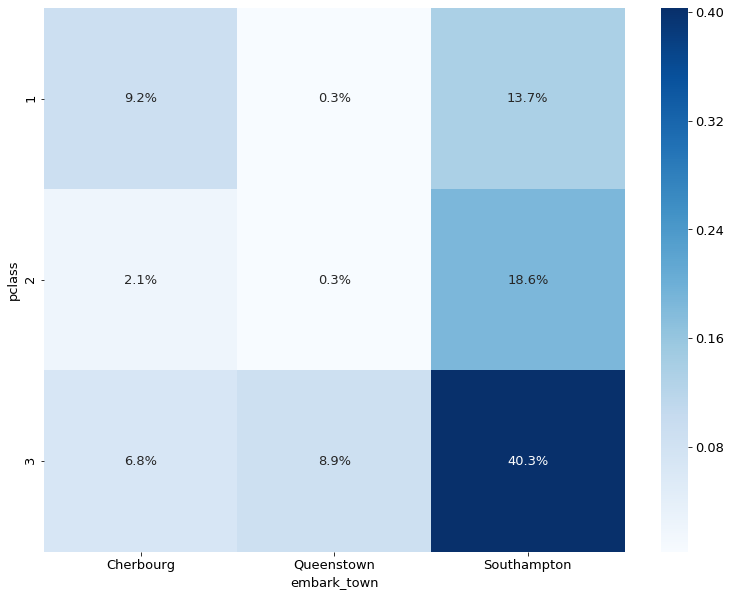

In [64]:
ctab = pd.crosstab(train.pclass, train.embark_town, normalize=True)
sns.heatmap(ctab, annot=True, cmap='Blues', fmt='.1%')

## Treat our target as a number

Survived is 1 or 0, this has some nice properties

- the sum of the survived column is the number of people that survived
- the mean is the survival rate
- this applies to subgroups

In [65]:
train.shape[0]

712

In [66]:
train.survived.sum()

277

In [69]:
survived = pd.Series([1, 1, 0])
survived.mean()

0.6666666666666666

In [67]:
train.survived.mean()

0.3890449438202247

In [76]:
train.groupby('sex').survived.mean()

sex
female    0.745020
male      0.195228
Name: survived, dtype: float64

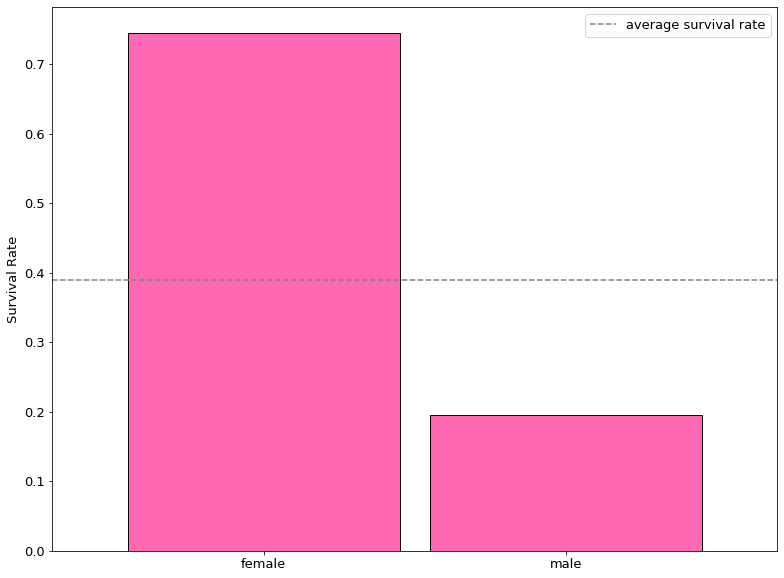

In [83]:
train.groupby('sex').survived.mean().plot.bar(ec='black', fc='hotpink', width=.9, label='')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Survival Rate')
# .hlines draws horizontal lines
# .hlines(height, starts, ends)
# .hlines(y, xmin, xmax)
plt.hlines(train.survived.mean(), *plt.xlim(), ls='--', color='grey', label='average survival rate')
plt.legend()

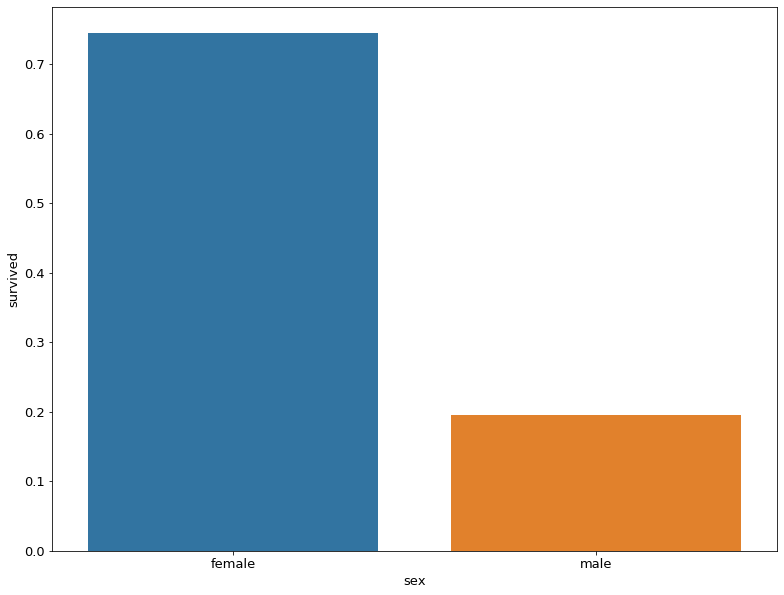

In [93]:
sns.barplot(x='sex', y='survived', data=train, ci=None)

## Exploring our "categorical" target by 2 different categories

In [94]:
train.groupby(['pclass', 'sex']).survived.mean()

pclass  sex   
1       female    0.985714
        male      0.375000
2       female    0.919355
        male      0.149425
3       female    0.512605
        male      0.147482
Name: survived, dtype: float64

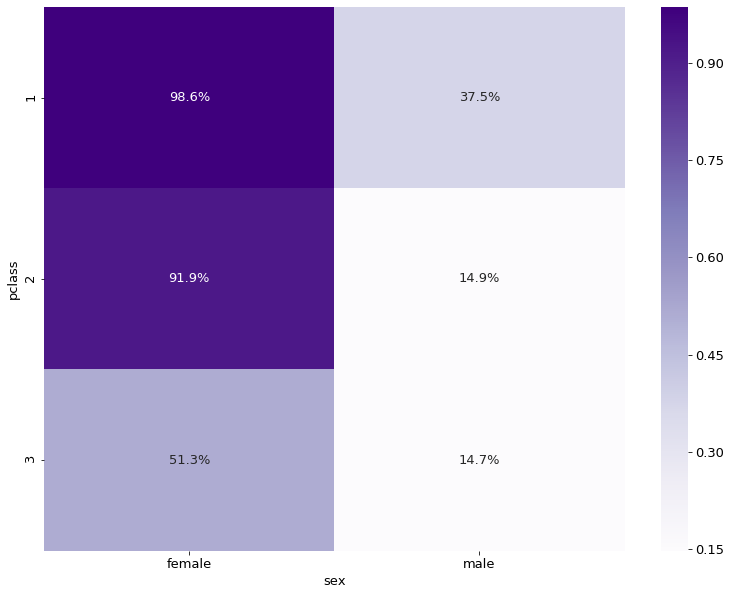

In [97]:
ctab = pd.crosstab(train.pclass, train.sex, values=train.survived, aggfunc='mean')
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.1%')

In [99]:
train.pivot_table('survived', 'pclass', 'sex')

sex,female,male
pclass,,
1,0.985714,0.375000
2,0.919355,0.149425
3,0.512605,0.147482


## Proportions within a group

- what percentage of people from each embark town are in each class?
- **not** what percentage of the overall population is each of those combinations of categories

Text(0.5, 0, '')

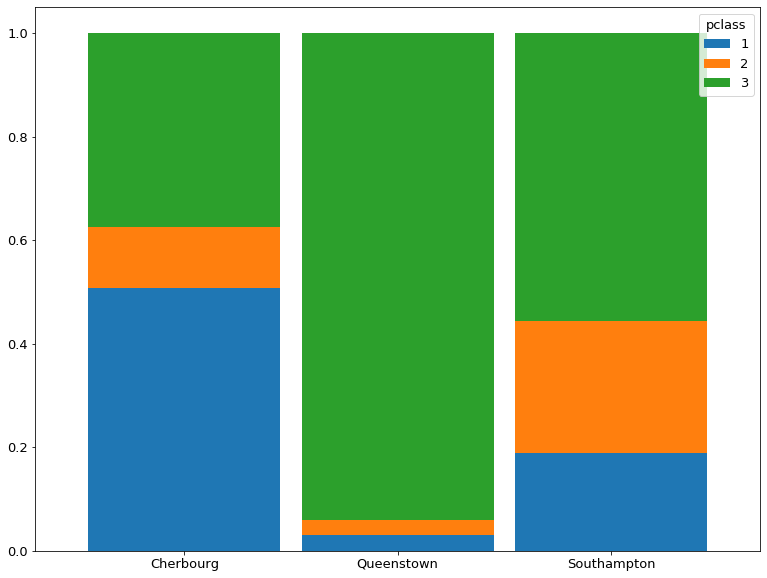

In [109]:
# for every unique embark_town, what is the percentage of values in each class?
x1 = 'embark_town'
x2 = 'pclass'

(train.groupby(x1)[x2]
 .apply(lambda s: s.value_counts(normalize=True)) # custom aggregation to get value counts by group
 .unstack() # turn an index into columns
 .plot.bar(stacked=True, width=.9))
plt.legend(title=x2)
plt.xticks(rotation=0)
plt.xlabel('')

What was the average fare for the combinations of departure town and class? boxplot, swarmplot, violinplot, or crosstab + heatmap

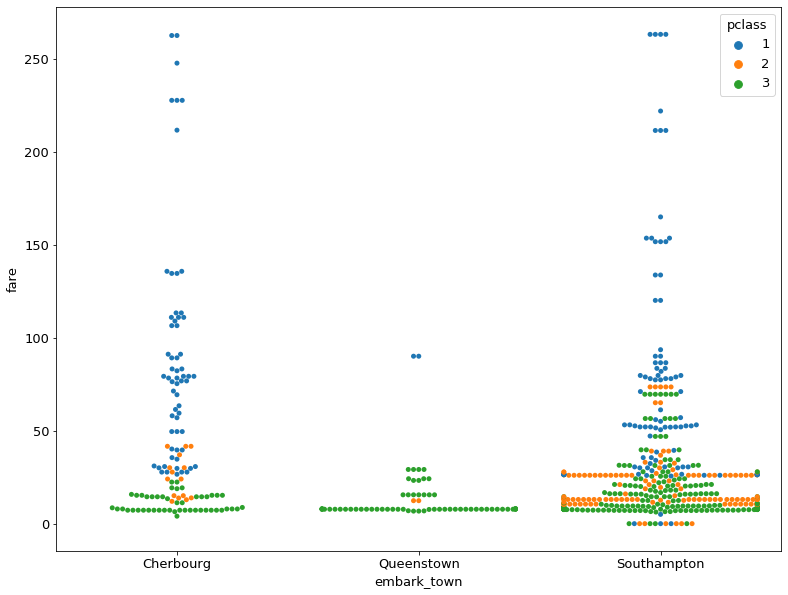

In [112]:
subset = train[train.fare < 300]
sns.swarmplot(y='fare', x='embark_town', data=subset, hue='pclass')

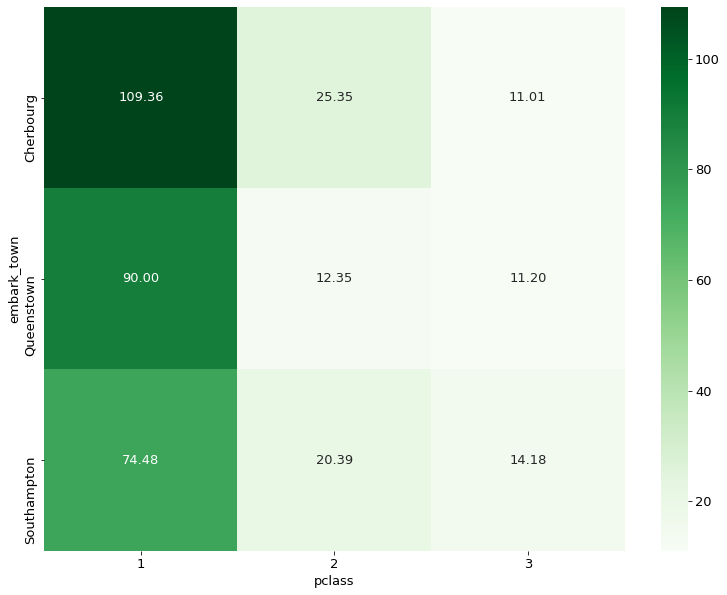

In [114]:
ctab = pd.crosstab(train.embark_town, train.pclass, values=train.fare, aggfunc='mean')
sns.heatmap(ctab, annot=True, cmap='Greens', fmt='.2f')

`pd.melt` -- curriculum code example

- `.melt` lets us combine multiple continuous measures on the same visualization
- We'll talk about it in more detail in a later lesson
- For the exercise, you can use the curriculum example code and change variable names

In [122]:
# "Melt" the dataset to "long-form" representation
subset = train[train.fare < 300][['survived','age','fare']]
subset.head()

,survived,age,fare
329,1,16.0,57.9792
749,0,31.0,7.7500
203,0,45.5,7.2250
421,0,21.0,7.7333
97,1,23.0,63.3583


In [123]:
melt = pd.melt(subset, "survived", var_name="measurement")
melt

,survived,measurement,value
0,1,age,16.000
1,0,age,31.000
2,0,age,45.500
3,0,age,21.000
4,1,age,23.000
...,...,...,...
1413,1,fare,23.000
1414,1,fare,12.350
1415,0,fare,7.925
1416,0,fare,7.250


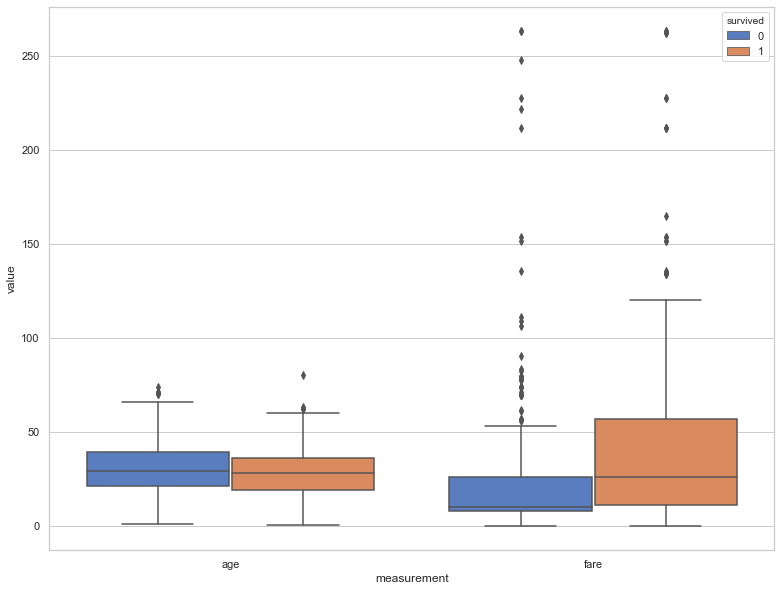

In [125]:
sns.boxplot(data=melt, y='value', x='measurement', hue='survived')

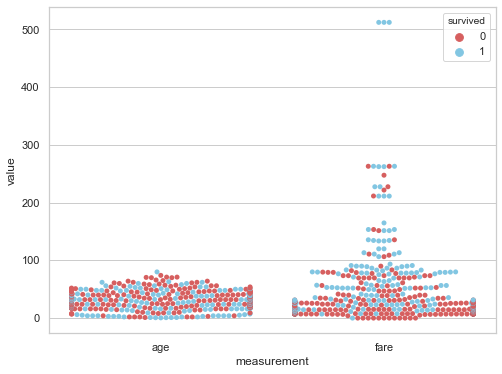

In [115]:
plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(
    x="measurement",
    y="value",
    hue="survived",
    palette=["r", "c", "y"],
    data=melt
)
# p.set(yscale="log")
plt.show()

## Binning for Exploration

Turning a continuous variable into a categorical one

In [140]:
pd.cut(train.age, 3).value_counts().sort_index()

(0.34, 26.947]      249
(26.947, 53.473]    276
(53.473, 80.0]       39
Name: age, dtype: int64

In [141]:
pd.qcut(train.age, 3).value_counts().sort_index()

(0.419, 23.0]    195
(23.0, 34.0]     183
(34.0, 80.0]     186
Name: age, dtype: int64

In [135]:
train['age_bin'] = pd.cut(train.age, bins=[0, 18, 80], labels=['child', 'adult'])

In [136]:
train.groupby('age_bin').survived.mean()

age_bin
child    0.514286
adult    0.396514
Name: survived, dtype: float64